# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
table = pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in table:
    mars_data.append(row)

# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data[0])
mars_df

# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('float')
mars_df['ls'] = mars_df['ls'].astype('float')
mars_df['month'] = mars_df['month'].astype('float')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?

2. How many Martian (not Earth) days' worth of data are there in the scraped dataset?

3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
    
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


* id: The identification number of a single transmission from Curiosity.
* terrestrial_date: The date on Earth.
* sol: The number of elapsed sols (Martian days) since Curiosity landed on Mars.
* ls: The solar longitude.
* month: The Martian month.
* min_temp: The minimum temperature, in Celsius, of a single Martian day (sol).
* pressure: The atmospheric pressure in Curiosity's location.

In [19]:
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10.0,155.0,6.0,-75.0,739.0
1,13,2012-08-17,11.0,156.0,6.0,-76.0,740.0
2,24,2012-08-18,12.0,156.0,6.0,-76.0,741.0
3,35,2012-08-19,13.0,157.0,6.0,-74.0,732.0
4,46,2012-08-20,14.0,157.0,6.0,-74.0,740.0


In [15]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].max()
mars_months

12.0

In [21]:
# 2. How many Martian (not Earth) days' worth of data are there in the scraped dataset?
mars_days = mars_df['sol'].count()
mars_days

1867

In [39]:
mars_monthly = mars_df.groupby('month').mean()

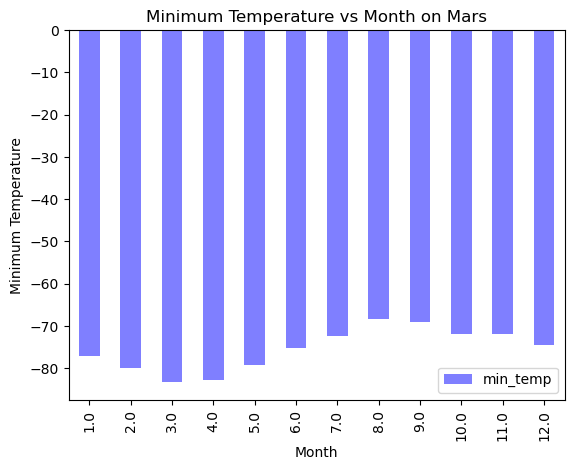

In [53]:
# What are the coldest and warmest months on Mars (at the location of Curiosity)? 
# Obtain the answer by averaging the minimum daily temperature of each month. Plot the results as a bar plot.
mars_monthly.plot(kind='bar', y='min_temp', title='Minimum Temperature vs Month on Mars', color='blue', alpha=0.5, align='center')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature')
plt.show()

### Rewrite
From the above Bar chart we can observe that 3rd month is the coldest month and 8th month is the hottest month on Mars.

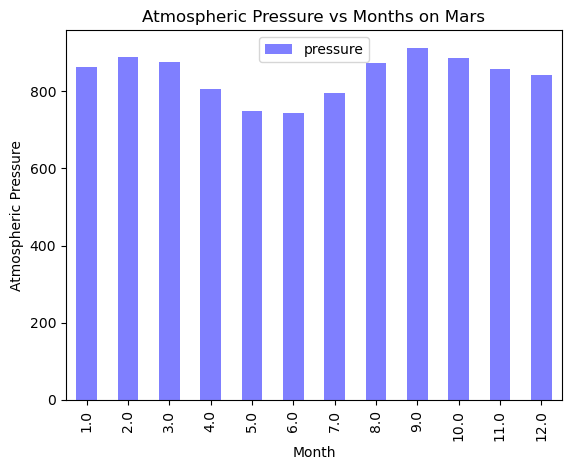

In [62]:
# which months have the lowest and highest atmospheric pressure on Mars? Obtain the answer by averaging the daily atmospheric pressure of each month. Plot the results as a bar plot.
mars_monthly.plot(kind='bar', y='pressure', title='Atmospheric Pressure vs Months on Mars', color='blue', alpha=0.5, align='center')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

### Rewrite
From the above Bar Chart we can Observe that the 6th month has the Lowest Atmospheric Pressure and the 9th month has the Highest Atmospheric Pressure on Mars.

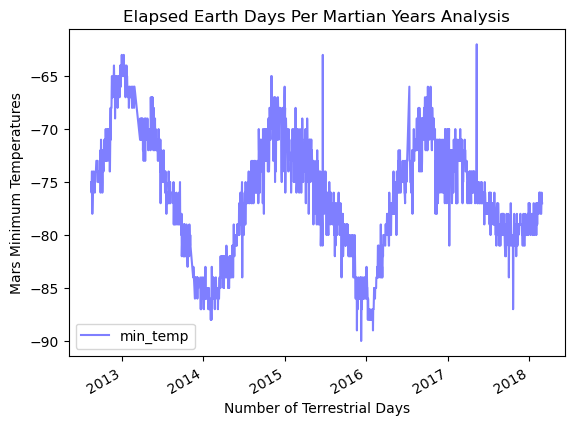

In [61]:
# Approximately how many terrestrial (earth) days are there in a Martian year? 
# In other words, in the time that Mars circles the Sun once, how many days elapse on the Earth? 
# Estimate the result visually by plotting the daily minimum temperature.

mars_df.plot(kind='line', x='terrestrial_date', y='min_temp', title='Elapsed Earth Days Per Martian Years Analysis', color='blue', alpha=0.5)
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Mars Minimum Temperatures')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Rewrite
From the above Scatter Plot we can observe that the pattern of the Minimum Temperature repeats itself roughly around every two years on Earth. Hence we can determine that One Martian Year is roughly around 1.8 to 2 Years on Earth.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV


In [33]:
browser.quit()